In [21]:
import matplotlib.pylab as plt
import pandas as pd
from sklearn.linear_model import BayesianRidge, Lasso, LassoCV, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from pandas_util import normalize_columns

In [14]:
car_df = pd.read_csv("./datasets/dmba/ToyotaCorolla.csv")
car_df = car_df.iloc[:1000]
normalize_columns(car_df)
car_df.head(3)

,id,model,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,...,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,parking_assistant,tow_bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [17]:
predictors = [
    "age_08_04",
    "km",
    "fuel_type",
    "hp",
    "met_color",
    "automatic",
    "cc",
    "doors",
    "quarterly_tax",
    "weight",
]
outcome = "price"

In [18]:
# Partition data.
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(
    X, y, test_size=0.4, random_state=1
)

In [19]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [20]:
# Print coefficients
print(pd.DataFrame({"Predictor": X.columns, "coefficient": car_lm.coef_}))

           Predictor  coefficient
0          age_08_04  -140.748761
1                 km    -0.017840
2                 hp    36.103419
3          met_color    84.281830
4          automatic   416.781954
5                 cc     0.017737
6              doors   -50.657863
7      quarterly_tax    13.625325
8             weight    13.038711
9   fuel_type_Diesel  1066.464681
10  fuel_type_Petrol  2310.249543


In [34]:
# Print performance measures (training data)
mean_absolute_error(train_y, car_lm.predict(train_X))

1046.9071608220581

In [35]:
mean_absolute_error(valid_y, car_lm.predict(valid_X))

1017.5971544783305

<AxesSubplot:>

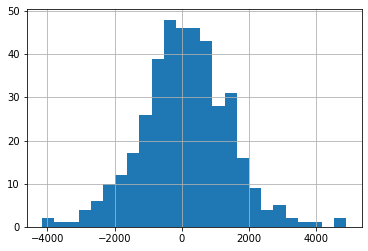

In [36]:
car_lm_pred = car_lm.predict(valid_X)
result = pd.DataFrame(
    {"Predicted": car_lm_pred, "Actual": valid_y, "Residual": valid_y - car_lm_pred}
)
result.Residual.hist(bins=25)

## Variable selection in Linear Regression

Goal is to reduce the number of predictors. This can be done by:

1) exhaustive search
2) popular subset selection algorithms, e.g. forward selection or backward elimination
3) regularization (shrinkage models)